In [2]:
import json
import pandas as pd

df = pd.read_csv('ga.csv')
df['totals'] = df['totals'].apply(json.loads)

df['trafficSource'] = df['trafficSource'].apply(json.loads)

### 수치형 컬럼을 추출을 해야한다.
df['pageviews'] = df['totals'].apply(lambda x: int(x.get('pageviews'),0))
df['hits'] = df['totals'].apply(lambda x: int(x.get('hits'),0))
df['visits'] = df['totals'].apply(lambda x: int(x.get('visits'),0))

## source, medium을 가지고 오자!
df['campaign'] = df['trafficSource'].apply(lambda x: x.get('campaign','(not set)')) 
df['source'] = df['trafficSource'].apply(lambda x: x.get('source','(not set)'))
df['medium'] = df['trafficSource'].apply(lambda x: x.get('medium','(not set)'))


## 집계
agg_df_sm = df.groupby(['date','source','medium'])[['pageviews','hits','visits']].sum().reset_index()

## struct
    - key- value  여러 개의 쌍을 포함하는 객체 ,딕셔너리처럼 작동 , json 기준 = {"browser": "Firefox", 'OS' : 'Android'}
## array
    - 여러 개의 값을 포함하는 리스트(list)형태의 데이터, 단순 값으로도 들어갈 수 있지만 -> struct 으로 들어갈 수 있다. 
        - 'items' :[{'id':111, {'id':112}]

In [3]:
df

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime,pageviews,hits,visits,campaign,source,medium
0,Direct,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",6.194190e+18,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",6194193421514403509_1472843572,Not Socially Engaged,"{'visits': '1', 'hits': '11', 'pageviews': '11...","{'campaign': '(not set)', 'source': '(direct)'...",1472843572,1,1472843572,11,11,1,(not set),(direct),(none)
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",5.327170e+18,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",5327166854580374902_1472844906,Not Socially Engaged,"{'visits': '1', 'hits': '11', 'pageviews': '10...","{'campaign': '(not set)', 'source': 'google', ...",1472844906,3,1472844906,10,11,1,(not set),google,organic
2,Referral,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8.885050e+18,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",8885051388942907862_1472827393,Not Socially Engaged,"{'visits': '1', 'hits': '13', 'pageviews': '11...","{'referralPath': '/', 'campaign': '(not set)',...",1472827393,7,1472827393,11,13,1,(not set),mall.googleplex.com,referral
3,Referral,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1.854680e+17,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",0185467632009737931_1472846398,Not Socially Engaged,"{'visits': '1', 'hits': '13', 'pageviews': '12...","{'referralPath': '/', 'campaign': '(not set)',...",1472846398,6,1472846398,12,13,1,(not set),mall.googleplex.com,referral
4,Referral,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3.244890e+18,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",3244885836845029978_1472824817,Not Socially Engaged,"{'visits': '1', 'hits': '17', 'pageviews': '14...","{'referralPath': '/', 'campaign': '(not set)',...",1472824817,4,1472824817,14,17,1,(not set),mall.googleplex.com,referral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11510,Referral,20170104,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",6.849600e+18,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",6849604863010168468_1483566314,Not Socially Engaged,"{'visits': '1', 'hits': '61', 'pageviews': '48...","{'referralPath': '/', 'campaign': '(not set)',...",1483566314,10,1483566314,48,61,1,(not set),mall.googleplex.com,referral
11511,Referral,20170104,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",2.119870e+17,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",0211986650009953276_1483568879,Not Socially Engaged,"{'visits': '1', 'hits': '66', 'pageviews': '30...","{'referralPath': '/', 'campaign': '(not set)',...",1483568879,2,1483568879,30,66,1,(not set),mall.googleplex.com,referral
11512,Referral,20170104,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9.981560e+18,"{""continent"": ""Asia"", ""subContinent"": ""Eastern...",9981562221973608723_1483576938,Not Socially Engaged,"{'visits': '1', 'hits': '122', 'pageviews': '9...","{'referralPath': '/', 'campaign': '(not set)',...",1483576938,1,1483576938,90,122,1,(not set),mall.googleplex.com,referral
11513,Direct,20170104,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",9.631260e+17,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",963126344221316701_1483552674,Not Socially Engaged,"{'visits': '1', 'hits': '130', 'pageviews': '9...","{'campaign': '(not set)', 'source': '(direct)'...",1483552674,3,1483552674,90,130,1,(not set),(direct),(none)


In [4]:
agg_df_sm

,date,source,medium,pageviews,hits,visits
0,20160801,(direct),(none),341,441,8
1,20160801,basecamp.com,referral,49,69,1
2,20160801,gatewaycdi.com,referral,14,18,1
3,20160801,google,organic,216,372,7
4,20160801,mall.googleplex.com,referral,428,568,16
...,...,...,...,...,...,...
1753,20170801,google,cpc,20,28,1
1754,20170801,google,cpm,5,5,1
1755,20170801,google,organic,244,319,6
1756,20170801,mail.google.com,referral,16,16,1


### 마케팅 Source, Medium별 성과 비교 
- trafficSource, totals


### 간단한 시각화

In [5]:
import json 

df=pd.read_csv('ga.csv')
##totals 풀기
df['totals']=df['totals'].apply(json.loads)
#trafficSource -> source, medium dict 객체로 변환해서 가지고 와야 한다.
df['trafficSource'] = df['trafficSource'].apply(json.loads)

## 수치형 컬럼을 추출을 해야 한다.
df['pageviews']=df['totals'].apply(lambda x : int(x.get('pageviews'),0))
df['hits']=df['totals'].apply(lambda x : int(x.get('hits'),0))
df['visits']=df['totals'].apply(lambda x : int(x.get('visits'),0))

## campaign, source, medium을 가지고 오자!
df['campaign']=df['trafficSource'].apply(lambda x : x.get('campaign','(not set)'))
df['source']=df['trafficSource'].apply(lambda x : x.get('source','(not set)'))
df['medium']=df['trafficSource'].apply(lambda x : x.get('medium','(not set)'))

## 집계
agg_df_sm=df.groupby(['date','source','medium'])[['pageviews','hits','visits']].sum().reset_index()

In [6]:
agg_df_sm

,date,source,medium,pageviews,hits,visits
0,20160801,(direct),(none),341,441,8
1,20160801,basecamp.com,referral,49,69,1
2,20160801,gatewaycdi.com,referral,14,18,1
3,20160801,google,organic,216,372,7
4,20160801,mall.googleplex.com,referral,428,568,16
...,...,...,...,...,...,...
1753,20170801,google,cpc,20,28,1
1754,20170801,google,cpm,5,5,1
1755,20170801,google,organic,244,319,6
1756,20170801,mail.google.com,referral,16,16,1


In [7]:
## 데이터 검증은 어떤 식으로 하면 될까!?
## 1. agg_df_sm 집계된 테이블 vs 원천이랑 비교하면 된다. ga.csv 이 둘의 값이 같으면 정상이고, 다르면 잘못한 것
## 검증 전 내가 join 또는 추출할 데이터의 타입을 맞춰주어야 한다. 공백도 제거하고, 타입도 맞추고

df['date'] = df['date'].astype(str)
df['source'] = df['source'].str.strip()
df['medium'] = df['medium'].str.strip()

agg_df_sm['date'] = agg_df_sm['date'].astype(str)
agg_df_sm['source'] = agg_df_sm['source'].str.strip()
agg_df_sm['medium'] = agg_df_sm['medium'].str.strip()


## Step1
## 검증할 조건을 변수로 만들기 
val_date = '20170801'
val_source = 'google'
val_medium = 'organic'

## Step 2
## 원천 데이터를 df로 추출하기
origin_sum = df[
    (df['date']==val_date) &
    (df['source']==val_source) & 
    (df['medium']==val_medium)      
][['pageviews','hits','visits']].sum()

## Step 3
## 집계된 테이블에서 추출하기

agg_sum = agg_df_sm[
    (agg_df_sm['date']==val_date) &
    (agg_df_sm['source']==val_source) & 
    (agg_df_sm['medium']==val_medium)      
][['pageviews','hits','visits']]

In [8]:
## plotly 시각화로 medium -> source 으로 

import plotly.express as px

fig = px.sunburst(
    agg_df_sm,
    path = ['medium','source'],
    values = 'pageviews',
    color = 'pageviews',
    color_continuous_scale = 'Blues',
)
fig.show()

## 데이터 검증은 어떤 식으로 하면 될까?
agg_df_sm -> 집계를 잘한건가?
하나 예시를 잡고 해야함

In [ ]:

## datetype 문제 -> 0,0,0이였음
df['date'] = df['date'].astype(str)
df['source'] = df['source'].str.strip()
df['medium'] = df['medium'].str.strip()

agg_df_sm['date'] = agg_df_sm['date'].astype(str)
agg_df_sm['source'] = agg_df_sm['source'].str.strip()
agg_df_sm['medium'] = agg_df_sm['medium'].str.strip()
## 1. agg_df_sm 집계된 테이블 vs 원친이랑 비교하면 된다. ga.csv 이 둘의 값이 같으면 정상이고 , 다르면 잘못한 것
## step1
## 검증할 조건을 변수로 만들기
val_date = '20170801'
val_source = 'google'
val_medium  = 'organic'

## step 2
## 원천 데이터를 df로 추출하기 (원천 데이터도 이상할수있으니 검증해야함)
origin_sum = df[
    (df['date']==val_date) &
    (df['source']== val_source) &
    (df['medium']==val_medium)
][['pageviews','hits','visits']].sum()

# ## datetype 문제 -> 0,0,0이였음
df['date'] = df['date'].astype(str)
df['source'] = df['source'].str.strip()
df['medium'] = df['medium'].str.strip()

agg_df_sm['date'] = agg_df_sm['date'].astype(str)
agg_df_sm['source'] = agg_df_sm['source'].str.strip()
agg_df_sm['medium'] = agg_df_sm['medium'].str.strip()


## step 3   
## 집계된 테이블에서 추출하기

agg_sum = agg_df_sm[
    (agg_df_sm['date'] == val_date) &
    (agg_df_sm['source'] == val_source) &
    (agg_df_sm['medium'] == val_medium)
][['pageviews','hits','visits']].sum()


In [10]:
origin_sum

pageviews    244
hits         319
visits         6
dtype: int64

In [11]:
agg_sum

pageviews    244
hits         319
visits         6
dtype: int64

### plotly 시각화 medium -> source 으로


In [12]:
import plotly.express as px
fig = px.sunburst(
    agg_df_sm,
    path = ['medium','source'],
    values = 'pageviews',
    color = 'pageviews',
    color_continuous_scale= 'Blues'
)
fig.show()

### date 시계열 데이터에 따라서 어떤 식으로 유입이 되는지?

In [13]:
melted_agg_df = agg_df_sm.melt(
    id_vars=['date','source','medium'],
    value_vars=['pageviews','hits','visits'],
    var_name='metric',
    value_name='value'
)

# 시계열 plotly

fig = px.line(
    melted_agg_df,
    x='date',
    y='value',
    color='source',
    line_dash = 'medium',
    facet_row='metric',
    labels = {'value':'Metric Value','date':'Date'}
)
fig.show()

- 채널에 비용을 계산할수있다. 광고대비 얼마나 성과를 냈는지 확인가능.
- 고객데이터 붙이면 고객이 어느 채널을 선호하고 조금 뎁스있는 분석이 가능하다.


### 필수과제
- medium, source에 대한 예산을 집행한다고 했을 때 -> 크게 medium , source 예산을 가정해서 만들고
- 해당 예산을 스프레드해서 예산 컬럼을 만들고 -> 컬럼 기준으로 효율성을 분석해보자
- 예산과 pageview,hits,visits에 따른 효율성을 측정하는 지표를 만들어 주세요!
- plotly를 통해 

예산 설정을 임의로 하기
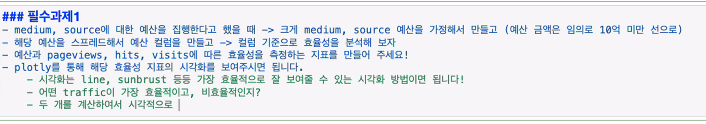

### 필수과제1
- medium, source에 대한 예산을 집행한다고 했을 때 -> 크게 medium, source 예산을 가정해서 만들고 (예산 금액은 임의로 10억 미만 선으로) 
- 해당 예산을 스프레드해서 예산 컬럼을 만들고 -> 컬럼 기준으로 효율성을 분석해 보자
- 예산과 pageviews, hits, visits에 따른 효율성을 측정하는 지표를 만들어 주세요!
- plotly를 통해 해당 효율성 지표의 시각화를 보여주시면 됩니다.
    - 시각화는 line, sunbrust 등등 가장 효율적으로 잘 보여줄 수 있는 시각화 방법이면 됩니다!
    - 어떤 traffic이 가장 효율적이고, 비효율적인지?
    - 두 개를 계산하여서 시각적으로 보여주시면 됩니다!